## Questions
<ul>
    <li><b>What was the change in price of the stock over time?</b></li>
    <li><b>What was the daily return of the stock on average?</b></li>
    <li><b>What was the moving average of the various stock??</b></li>
    <li><b>What was the correlation between different stocks' closing prices??</b></li>
    <li><b>What was the correlation between different stocks' daily returns??</b></li>
    <li><b>How much value do we put at risk by investing in a particular stock??</b></li>
    <li><b>How can we attempt to predict stock behavior??</b></li>
</ul>

In [1]:
# Core
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# Visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader.data as web
from datetime import datetime

In [3]:
sns.set_style("whitegrid")

In [4]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]

In [5]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, "yahoo", start, end)

In [8]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-10,111.089996,111.089996,105.830002,107.790001,106.084061,57134500
2016-11-11,107.120003,108.870003,106.550003,108.430000,106.713936,34094100
2016-11-14,107.709999,107.809998,104.080002,105.709999,104.036980,51175500
2016-11-15,106.570000,107.680000,106.160004,107.110001,105.414825,32264500
2016-11-16,106.699997,110.230003,106.599998,109.989998,108.249237,58840500


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-11-10 to 2017-11-10
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


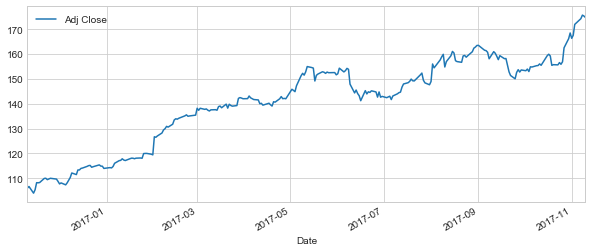

In [10]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

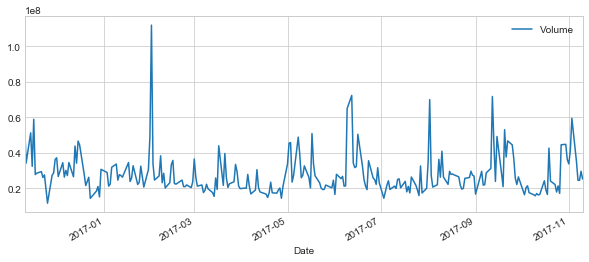

In [11]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))

In [16]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = Series(AAPL["Adj Close"]).rolling(window=ma).mean()

### Moving averages for Apple prices

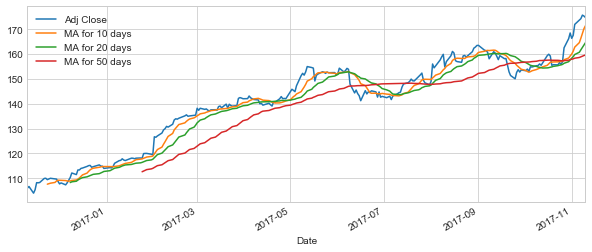

In [20]:
AAPL[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(subplots=False, figsize=(10,4))

### Adjusted closing prices for Apple

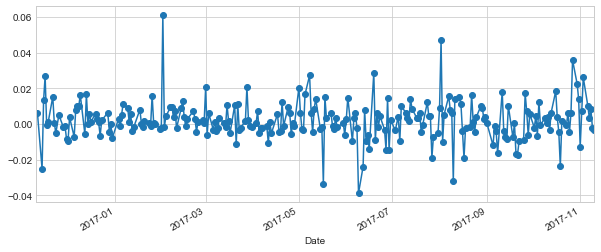

In [28]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()
AAPL["Daily Return"].plot(figsize=(10,4), marker="o")

### Apple average daily returns 

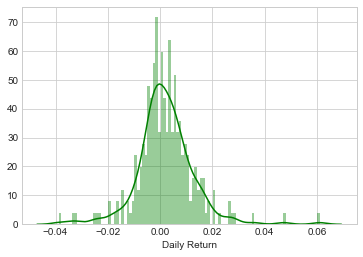

In [32]:
# AAPL["Daily Return"].hist(bins=100)
sns.distplot(AAPL["Daily Return"].dropna(),bins=100, color="green")


### Closing prices of all the stock on the list

In [37]:
closing_df = web.DataReader(tech_list, "yahoo", start, end)["Adj Close"]

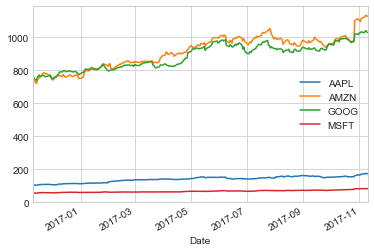

In [40]:
closing_df.plot()

In [42]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-10,174.669998,1125.349976,1028.069946,83.870003
2017-11-09,175.250000,1129.130005,1031.260010,84.089996
2017-11-08,175.608719,1132.880005,1039.849976,84.559998
2017-11-07,174.183823,1123.170044,1033.329956,84.269997
2017-11-06,173.625839,1120.660034,1025.900024,84.470001


In [43]:
tech_rets = closing_df.pct_change()

In [44]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-10,NaN,NaN,NaN,NaN
2017-11-09,0.003321,0.003359,0.003103,0.002623
2017-11-08,0.002047,0.003321,0.008330,0.005589
2017-11-07,-0.008114,-0.008571,-0.006270,-0.003430
2017-11-06,-0.003203,-0.002235,-0.007190,0.002373


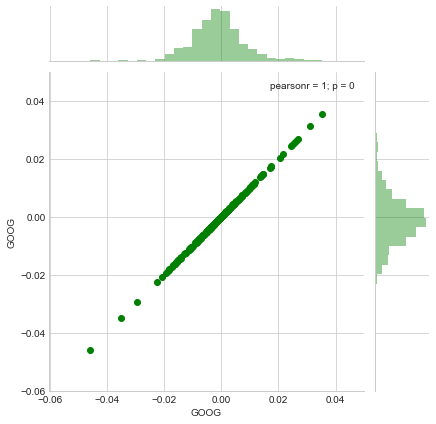

In [47]:
sns.jointplot("GOOG","GOOG",tech_rets, kind="scatter", color="green")

### Correlation between Google and Microsoft

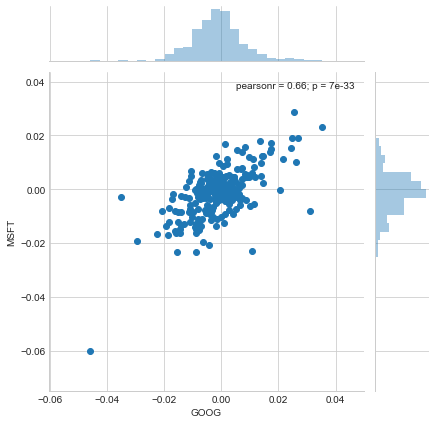

In [48]:
sns.jointplot("GOOG","MSFT",tech_rets, kind="scatter")

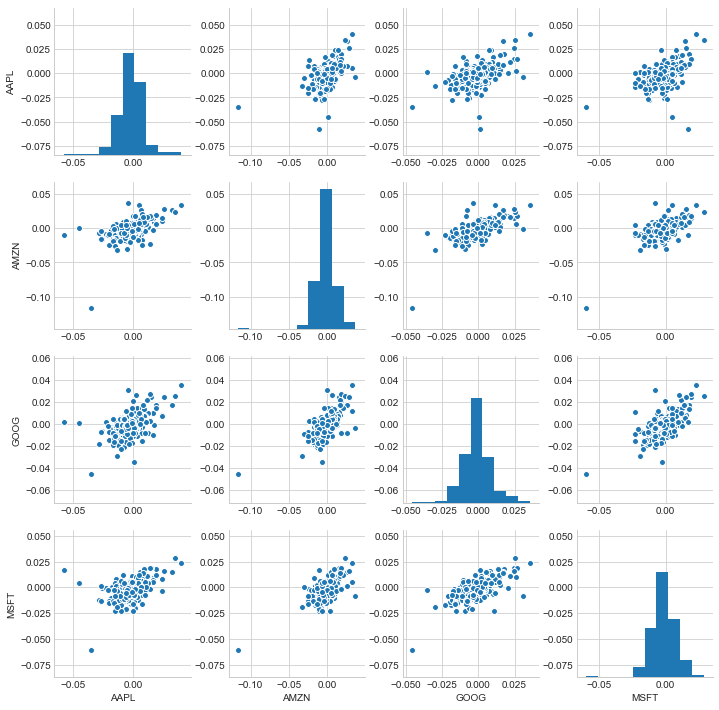

In [51]:
sns.pairplot(tech_rets.dropna())

### pairplot is great, but to have more controll it is better to to use PairGrid

#### Below is a PairGrid showing the correlation between the different stocks

/Users/viliheikkila/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


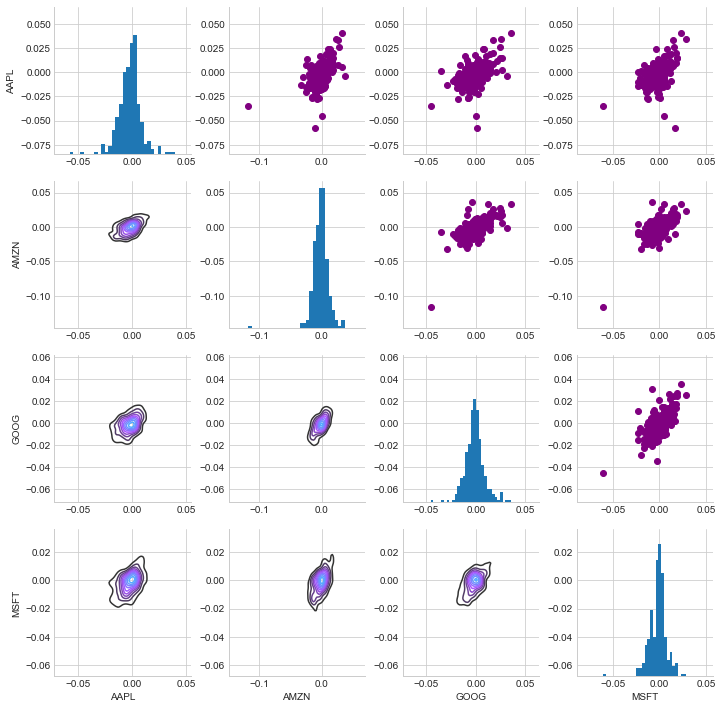

In [74]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

/Users/viliheikkila/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


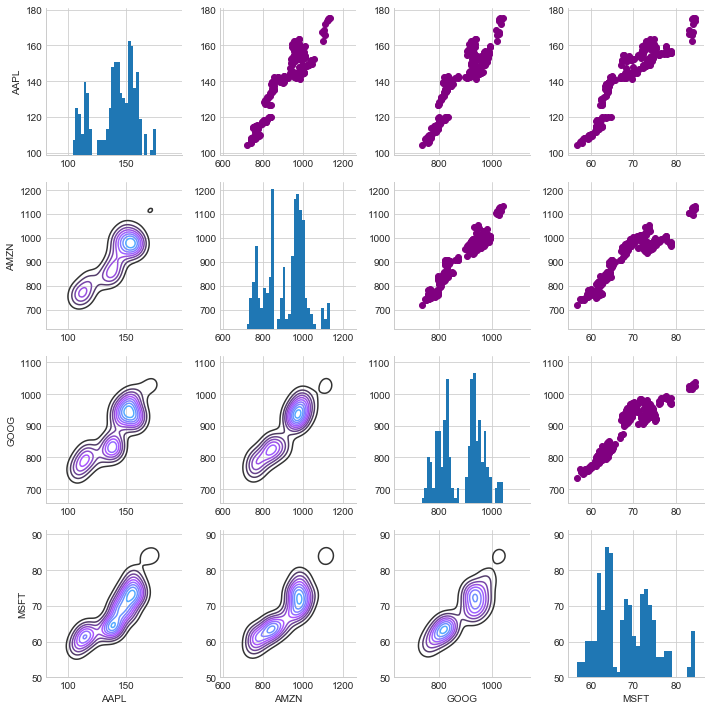

In [75]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

### sns no longer has corrplot, so thus we are using heatmaps to see numeric values for the correlations

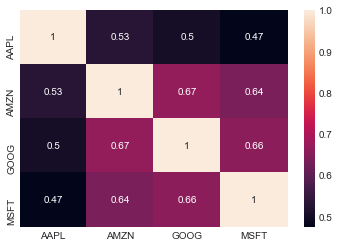

In [80]:
sns.heatmap(tech_rets.dropna().corr(), annot=True)

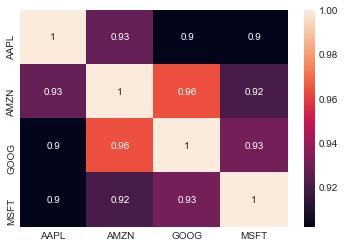

In [81]:
sns.heatmap(closing_df.dropna().corr(), annot=True)

### some risk analysis

In [82]:
rets = tech_rets.dropna()

In [104]:
area = np.pi*20

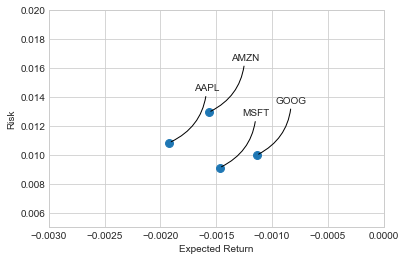

In [140]:
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")
plt.ylim(0.005,0.02)
plt.xlim(-0.003,0)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (50, 50),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-",
                          connectionstyle = "arc3,rad=-0.3"))


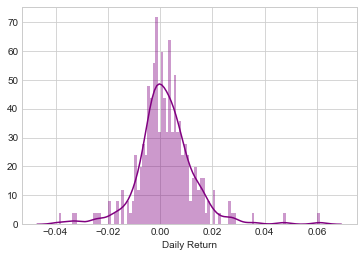

In [141]:
sns.distplot(AAPL["Daily Return"].dropna(),
             bins=100,
             color="purple")


In [155]:
# 5% of the cases we can lose maximum of 1.7% of the investment
rets["AAPL"].quantile(0.05)

-0.017298812989975217

In [178]:
days = 365
dt = 1/days
mu = rets.mean()["GOOG"]
sigma = rets.std()["GOOG"]


In [180]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,
                                    scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
        
        

In [181]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-10,791.169983,791.169983,752.179993,762.559998,762.559998,4745200
2016-11-11,756.539978,760.780029,750.380005,754.020020,754.020020,2431800
2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3631700
2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1465200


Text(0.5,1,'Monte Carlo Analysis for Google stock')

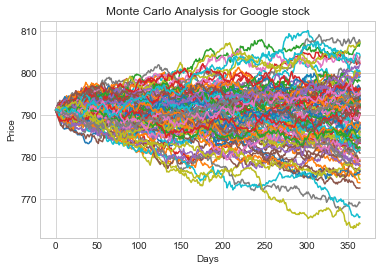

In [187]:
start_price = 791.169983

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google stock")

In [188]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

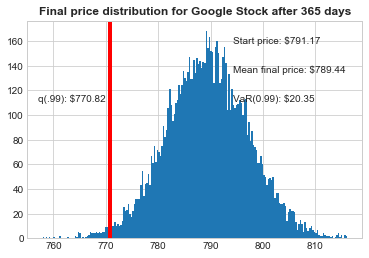

In [194]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 00% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2F" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color="r")

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight="bold")
